Aim : Logistic Regression and Decision Tree
* Build a logistic regression model to predict a binary outcome.
* Evaluate the model's performance using classification metrics (e.g., accuracy, precision, recall).
* Construct a decision tree model and interpret the decision rules for classification.

## **Logistic Regression**


In [147]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             precision_score, recall_score, f1_score, roc_curve, auc)
import matplotlib.pyplot as plt

In [148]:
# 2. Load the Dataset
data_path = "Churn_Modelling.csv"   # keep CSV in same folder / upload in Colab
df = pd.read_csv(data_path)

In [159]:
# 3. Encode Categorical Variables
#    Categorical columns: Geography, Gender
#    We will use one-hot encoding and drop the first category to avoid dummy trap
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
print("\nColumns after encoding:")
print(df_encoded.columns)


Columns after encoding:
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male'],
      dtype='object')


In [160]:
# 4. Define Features (X) and Target (y)
#    Remove identifier-like columns that do not help in prediction
X = df_encoded.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df_encoded['Exited']

print("\nFeature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (10000, 11)
Target vector shape: (10000,)


In [161]:
# 5. Split the Dataset into Training and Testing Set
#    80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y            # keeps class ratio same in train and test
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)



Training set shape: (8000, 11)
Testing set shape: (2000, 11)


In [162]:
# 6. Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [163]:
# 7. Build and Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [164]:
# 8. Make Predictions on Test Data
y_pred = log_reg.predict(X_test_scaled)

In [165]:
# 9. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy  :", round(accuracy, 4))
print("Precision :", round(precision, 4))
print("Recall    :", round(recall, 4))
print("F1-score  :", round(f1, 4))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy  : 0.808
Precision : 0.5891
Recall    : 0.1867
F1-score  : 0.2836

Confusion Matrix:
[[1540   53]
 [ 331   76]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



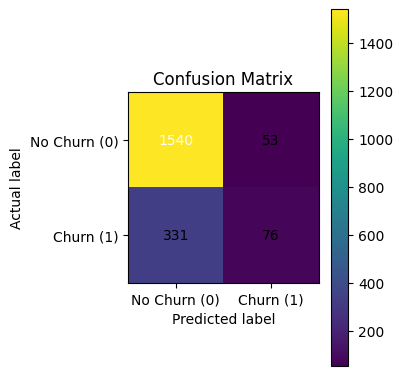

In [166]:
# 10. Plot Confusion Matrix
plt.figure(figsize=(4, 4))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['No Churn (0)', 'Churn (1)'])
plt.yticks(tick_marks, ['No Churn (0)', 'Churn (1)'])

# Add text inside each box
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

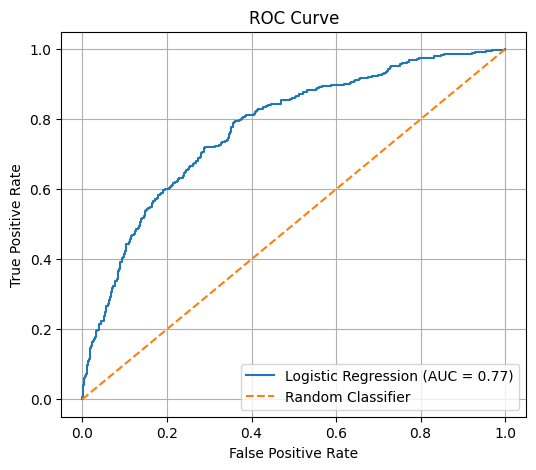

In [167]:
# 11. ROC Curve and AUC
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]  # probability of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

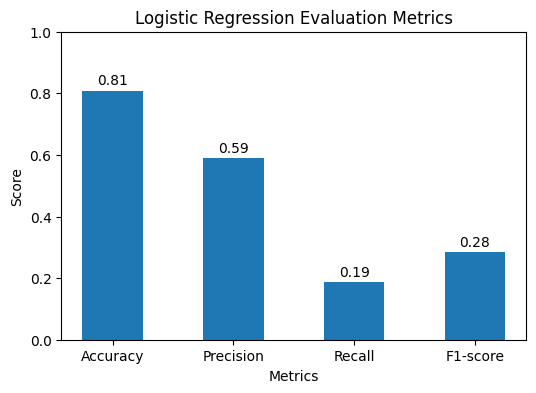

In [168]:
# 12. Bar Plot of Evaluation Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, width=0.5)
plt.ylim(0, 1)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Logistic Regression Evaluation Metrics")
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()

## **Decision Tree**

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [34]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
# Checking basic information
#df.info()
#df.describe()

In [35]:
# Dropping columns that are not useful for prediction
# (ID-like or text columns)
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
# Label Encoding for categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [44]:
# Handling missing values (if any) – example on CreditScore
# (This will just keep values same if there are no NaNs)
df['CreditScore'] = df.groupby("Geography")['CreditScore'].transform(lambda x: x.fillna(x.mean()))

In [76]:
#df

## Splitting data into X and y

In [46]:
# We will predict whether a customer has Exited (churned) or not
X = df.drop('Exited', axis=1)
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

## Building the Decision Tree model

In [43]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, criterion='gini')
clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(random_state=0)

## Checking accuracy of testing dataset

In [49]:
from sklearn.metrics import accuracy_score
import math
predictions_test = clf.predict(X_test)
print("Accuracy (Test) : ", accuracy_score(y_test, predictions_test) * 100)

Accuracy (Test) :  78.7


In [50]:
predictions_train = clf.predict(X_train)
print("Accuracy (Train) : ", accuracy_score(y_train, predictions_train) * 100)

Accuracy (Train) :  100.0


## Visualizing the Decision Tree

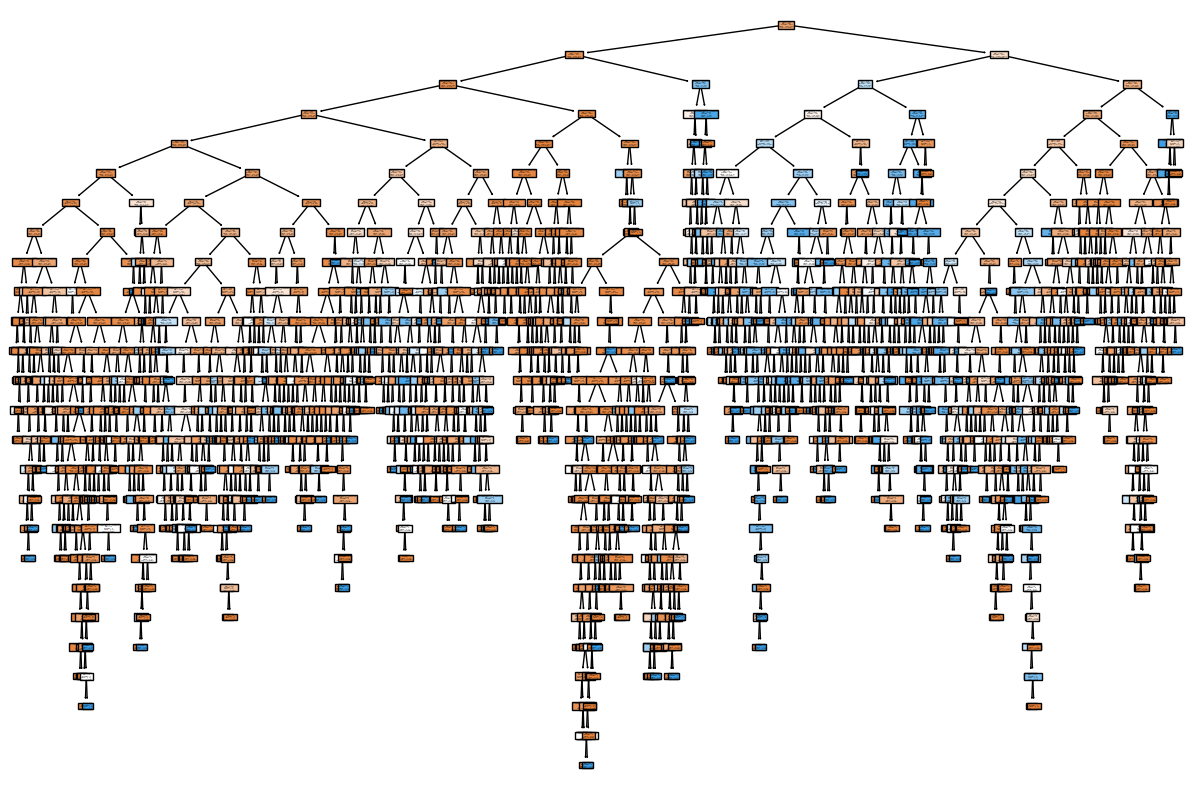

In [78]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Churn', 'Churn'])
plt.show()

## Evaluating our test dataset

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report (Test):")
print(classification_report(y_test, predictions_test))

print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, predictions_test))

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1602
           1       0.47      0.53      0.50       398

    accuracy                           0.79      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000

Confusion Matrix (Test):
[[1362  240]
 [ 186  212]]


## Evaluating our training dataset

In [58]:
print("Classification Report (Train):")
print(classification_report(y_train, predictions_train))

print("Confusion Matrix (Train):")
print(confusion_matrix(y_train, predictions_train))

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6361
           1       1.00      1.00      1.00      1639

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Confusion Matrix (Train):
[[6361    0]
 [   0 1639]]


## Finding false positive rate and true positive rate

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score
dt_probs = clf.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)
print("FPR :", fpr_dt)
print("TPR :", tpr_dt)
print("Thresholds :", thresholds_dt)

FPR : [0.         0.14981273 1.        ]
TPR : [0.         0.53266332 1.        ]
Thresholds : [inf  1.  0.]


## Plotting ROC curve for our Decision Tree

AUC Score : 0.6914252912502586


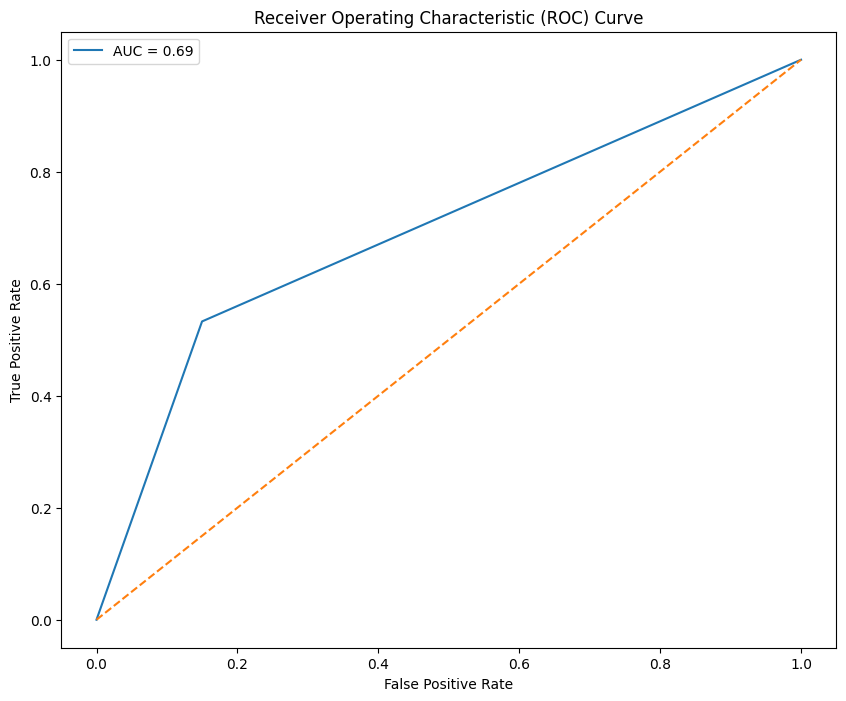

In [63]:
auc_score_dt = auc(fpr_dt, tpr_dt)
print("AUC Score :", auc_score_dt)

def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10, 8))
    plt.plot(fpr_dt, tpr_dt, label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr_dt, tpr_dt)

## Pruning of our decision tree

In [66]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

## Visualizing alpha w.r.t impurity of leaves

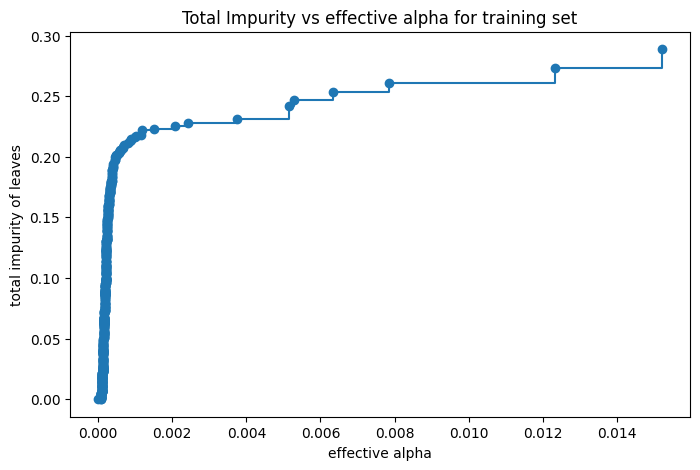

In [67]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

## Training trees for different alphas

In [68]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf_temp = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_temp.fit(X_train, y_train)
    clfs.append(clf_temp)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
    clfs[-1].tree_.node_count, ccp_alphas[-1]))
# Removing the last tree (single node)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03708688757596712


## Nodes and depth vs alpha

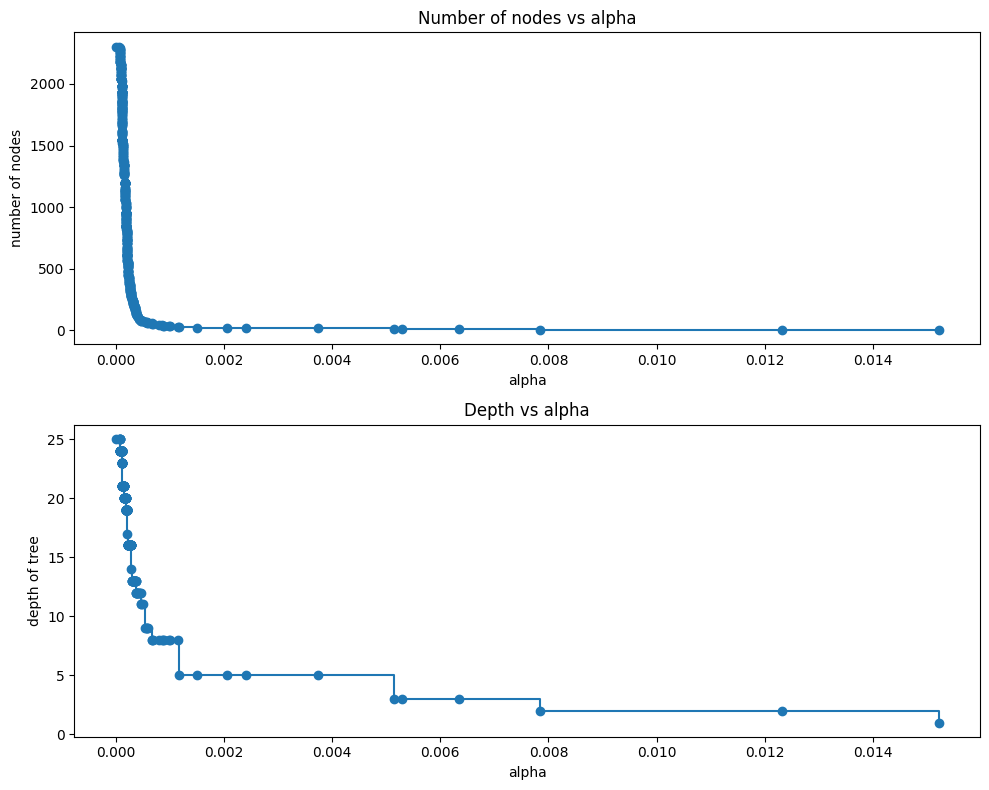

In [70]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
plt.show()

## Accuracy vs alpha

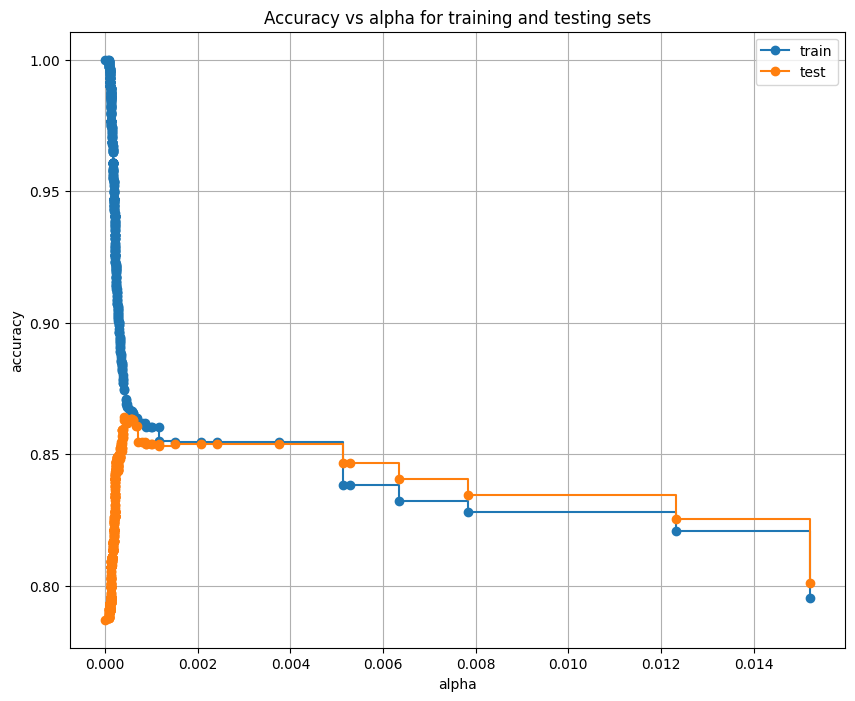

In [71]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()


## Accuracy after pruning

In [72]:
# -----------------------------
# (Choose an alpha from the plot where test accuracy is reasonable
# and overfitting is reduced. Example: 0.016 – you can change this
# based on your plot.)
# -----------------------------
clf_pruned = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
clf_pruned.fit(X_train, y_train)
clf_pruned

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

## Accuracy of test dataset after pruning

In [73]:
pred_pruned_test = clf_pruned.predict(X_test)
accuracy_score(y_test, pred_pruned_test)

0.801

## Accuracy of training dataset after pruning

In [74]:
pred_pruned_train = clf_pruned.predict(X_train)
accuracy_score(y_train, pred_pruned_train)

0.795125

## Visualizing the pruned tree

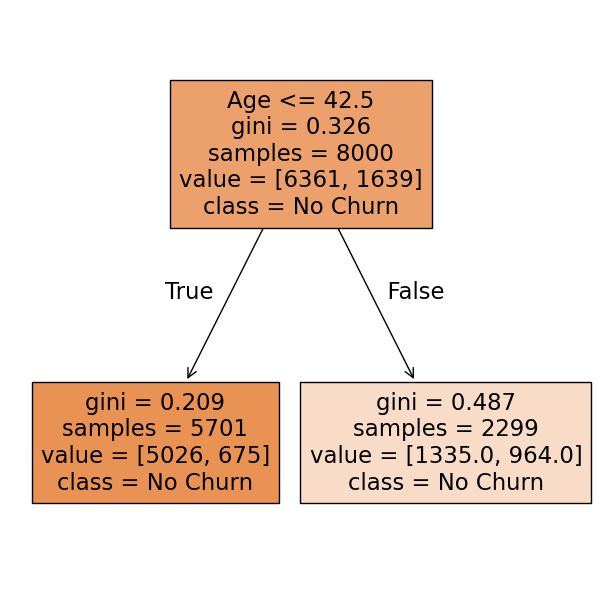

In [75]:
from sklearn import tree
plt.figure(figsize=(7.5, 7.5))
tree.plot_tree(clf_pruned, filled=True, feature_names=X.columns, class_names=['No Churn', 'Churn'])
plt.show()